# STA326 Assignment 2: Data Visualization

## Introduction

**[Gett](https://www.gett.com/)**, previously known as GetTaxi, is an Israeli-developed technology platform solely focused on corporate Ground Transportation Management (GTM). They have an application where clients can order taxis, and drivers can accept their rides (offers). At the moment, when the client clicks the Order button in the application, the matching system searches for the most relevant drivers and offers them the order. In this task, we would like to investigate some matching metrics for orders that did not completed successfully, i.e., the customer didn't end up getting a car.

In [260]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
import matplotlib.pyplot as plt

In [261]:
df_offers = pd.read_csv('datasets/data_offers.csv')
df_orders = pd.read_csv('datasets/data_orders.csv')


In [262]:
print(df_offers)

             order_gk      offer_id
0       3000579625629  300050936206
1       3000627306450  300052064651
2       3000632920686  300052408812
3       3000632771725  300052393030
4       3000583467642  300051001196
...               ...           ...
334358  3000552921666  300050611632
334359  3000593796526  300051443024
334360  3000590955748  300051340498
334361  3000557510943  300050772593
334362  3000630405861  300052291934

[334363 rows x 2 columns]


## Tasks
Please complete the following tasks.
1. Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?
2. Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?
3. Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?
4. Plot the distribution of average ETA by hours. How can this plot be explained?
5. **BONUS** Hexagons. Using the [h3](https://github.com/uber/h3-py) and [folium](https://python-visualization.github.io/folium/latest/) packages, calculate how many sizes [8 hexes](https://h3geo.org/#/documentation/core-library/resolution-table) contain 80% of all orders from the original data sets and visualise the hexes, colouring them by the number of fails on the map.

### task 1

In [223]:
# Group the data by 'order_status_key' and 'is_driver_assigned_key', and calculate the count
grouped_df = df_orders.groupby(['order_status_key', 'is_driver_assigned_key']).size().reset_index(name='count')

# Print the new DataFrame
print(grouped_df)

   order_status_key  is_driver_assigned_key  count
0                 4                       0   4496
1                 4                       1   2811
2                 9                       0   3406
3                 9                       1      3


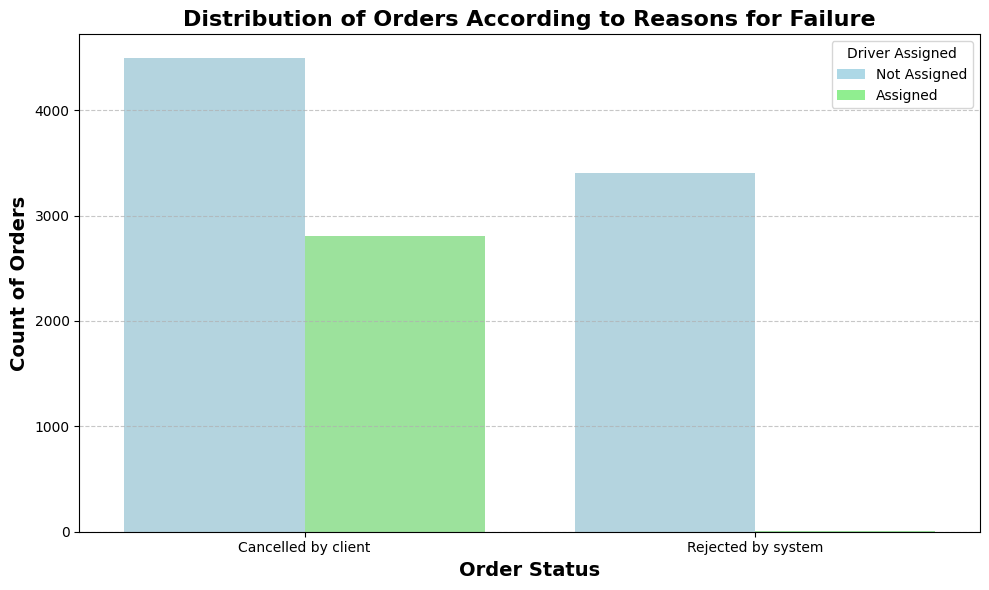

In [224]:
# Map original order_status_key values to the desired group names
status_key_mapping = {4: 'Cancelled by client', 9: 'Rejected by system'}
grouped_df['order_status_key'] = grouped_df['order_status_key'].map(status_key_mapping)

# Set the figure size using Seaborn
plt.figure(figsize=(10, 6))

# Define custom colors for the groups (light blue and light green)
custom_palette = {0: '#ADD8E6', 1: '#90EE90'}

# Plot the grouped bar plot with custom colors
sns.barplot(data=grouped_df, x='order_status_key', y='count', hue='is_driver_assigned_key', palette=custom_palette)

# Create custom legend entries with colors
legend_elements = [
    Patch(facecolor='#ADD8E6', label='Not Assigned'),  # Light blue
    Patch(facecolor='#90EE90', label='Assigned')      # Light green
]

# Add legend with custom entries
plt.legend(handles=legend_elements, title='Driver Assigned', loc='upper right')

plt.title('Distribution of Orders According to Reasons for Failure', fontsize=16, fontweight='bold')
plt.xlabel('Order Status', fontsize=14, fontweight='bold')
plt.ylabel('Count of Orders', fontsize=14, fontweight='bold')

# Add dashed lines in the background to suggest levels of y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### task 2

In [225]:
# Convert 'order_datetime' column to datetime type
df_orders['order_datetime'] = pd.to_datetime(df_orders['order_datetime'])

# Extract the hour from 'order_datetime'
df_orders['order_hour'] = df_orders['order_datetime'].dt.hour

# Select the columns of interest
selected_columns = ['order_status_key', 'is_driver_assigned_key', 'order_hour', 'order_datetime']

# Group by the selected columns and count the number of orders
grouped_df = df_orders[selected_columns].groupby(['order_status_key', 'is_driver_assigned_key', 'order_hour']).size().reset_index(name='count')

# Display the resulting dataframe
print(grouped_df)

    order_status_key  is_driver_assigned_key  order_hour  count
0                  4                       0           0    298
1                  4                       0           1    219
2                  4                       0           2    237
3                  4                       0           3    224
4                  4                       0           4     50
..               ...                     ...         ...    ...
69                 9                       0          21    296
70                 9                       0          22    241
71                 9                       0          23    302
72                 9                       1           0      2
73                 9                       1          16      1

[74 rows x 4 columns]


In [226]:
# Pivot the grouped dataframe for better visualization
pivot_df = grouped_df.pivot_table(index='order_hour', columns=['order_status_key', 'is_driver_assigned_key'], values='count', fill_value=0)

# Print the pivot dataframe
print(pivot_df)

order_status_key          4         9   
is_driver_assigned_key    0    1    0  1
order_hour                              
0                       298  120  263  2
1                       219   88  164  0
2                       237   78  240  0
3                       224   64  225  0
4                        50   41   61  0
5                        15   25   27  0
6                        67   47   45  0
7                       164  156  127  0
8                       413  314  355  0
9                       148  156  108  0
10                       51   79   40  0
11                       55  111   27  0
12                      106   99   51  0
13                      148  120   98  0
14                      106   97   53  0
15                      172  143  124  0
16                      143  131   81  1
17                      227  167  147  0
18                      158  134  122  0
19                      113  120   84  0
20                      230  114  125  0
21              

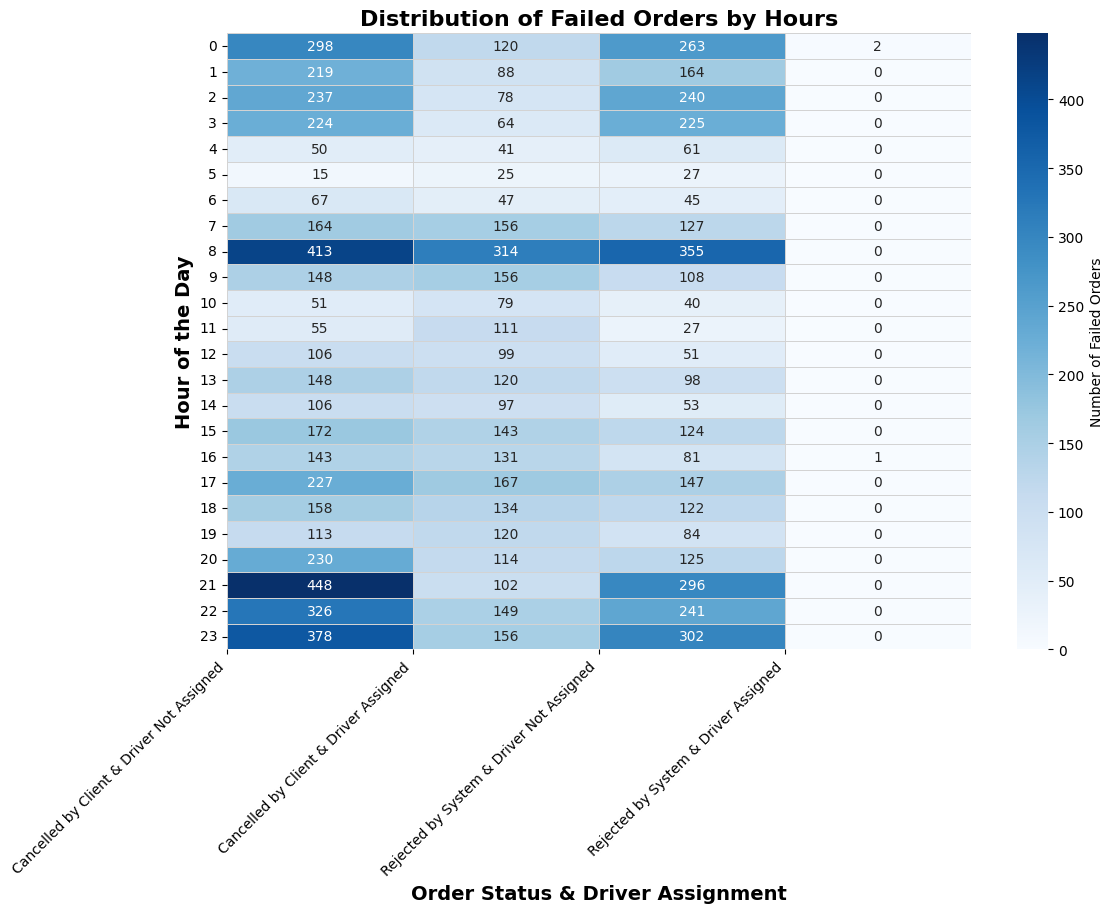

In [227]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Plot heatmap
sns.heatmap(pivot_df, cmap='Blues', linewidths=0.5, linecolor='lightgrey', annot=True, fmt='d', cbar_kws={'label': 'Number of Failed Orders'})

# Set title and labels
plt.title('Distribution of Failed Orders by Hours', fontsize=16, fontweight='bold')
plt.xlabel('Order Status & Driver Assignment', fontsize=14, fontweight='bold')
plt.ylabel('Hour of the Day', fontsize=14, fontweight='bold')

# Update x-axis tick labels
xtick_labels = ['Cancelled by Client & Driver Not Assigned', 
                'Cancelled by Client & Driver Assigned',
                'Rejected by System & Driver Not Assigned',
                'Rejected by System & Driver Assigned']
plt.xticks(ticks=range(len(xtick_labels)), labels=xtick_labels, rotation=45, ha='right')

# Show plot
plt.yticks(rotation=0)  # Rotate y-axis labels for better readability
plt.show()

### task 3

In [228]:
df_orders = pd.read_csv('datasets/data_orders.csv')

# Convert 'order_datetime' column to datetime type
df_orders['order_datetime'] = pd.to_datetime(df_orders['order_datetime'])

# Extract the hour from 'order_datetime'
df_orders['order_hour'] = df_orders['order_datetime'].dt.hour

In [229]:
# Group by is_driver_assigned_key
grouped = df_orders.groupby('is_driver_assigned_key')

# Define a function to filter outliers
def remove_outliers(group):
    q1 = group['cancellations_time_in_seconds'].quantile(0.25)
    q3 = group['cancellations_time_in_seconds'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return group[(group['cancellations_time_in_seconds'] >= lower_bound) & (group['cancellations_time_in_seconds'] <= upper_bound)]

# Apply the remove_outliers function to each group
filtered_groups = grouped.apply(remove_outliers).reset_index(drop=True)

# Group the filtered data by order_hour and is_driver_assigned_key and calculate the mean
mean_df = filtered_groups.groupby(['order_hour', 'is_driver_assigned_key'])['cancellations_time_in_seconds'].mean().reset_index()

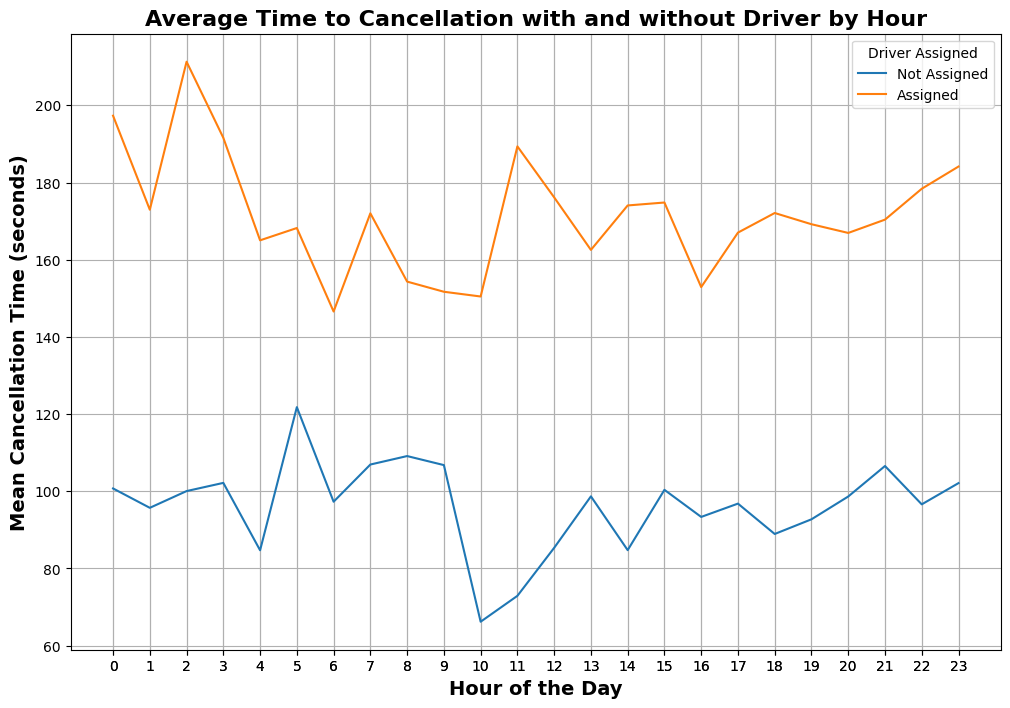

In [230]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the average cancellation time by hour for both driver assigned and not assigned orders
sns.lineplot(data=mean_df, x='order_hour', y='cancellations_time_in_seconds', hue='is_driver_assigned_key')

# Set title and labels
plt.title('Average Time to Cancellation with and without Driver by Hour', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=14, fontweight='bold')
plt.ylabel('Mean Cancellation Time (seconds)', fontsize=14, fontweight='bold')

# Update legend
legend_labels = {0: 'Not Assigned', 1: 'Assigned'}
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, title='Driver Assigned', labels=[legend_labels[key] for key in legend_labels])

# Set x-axis ticks to show every hour from 0 to 23
plt.xticks(mean_df['order_hour'])

plt.grid(True)
plt.show()

### task 4

In [234]:
# Group by order hour and calculate the mean ETA for each hour
average_eta_by_hour = df_orders.groupby('order_hour')['m_order_eta'].mean()

print(average_eta_by_hour)

order_hour
0     357.959016
1     324.750000
2     391.012821
3     388.093750
4     299.658537
5     411.120000
6     427.148936
7     583.358974
8     636.910828
9     504.891026
10    355.556962
11    390.954955
12    440.787879
13    428.025000
14    387.835052
15    454.790210
16    440.568182
17    519.742515
18    419.186567
19    369.816667
20    300.096491
21    333.852941
22    372.744966
23    408.429487
Name: m_order_eta, dtype: float64


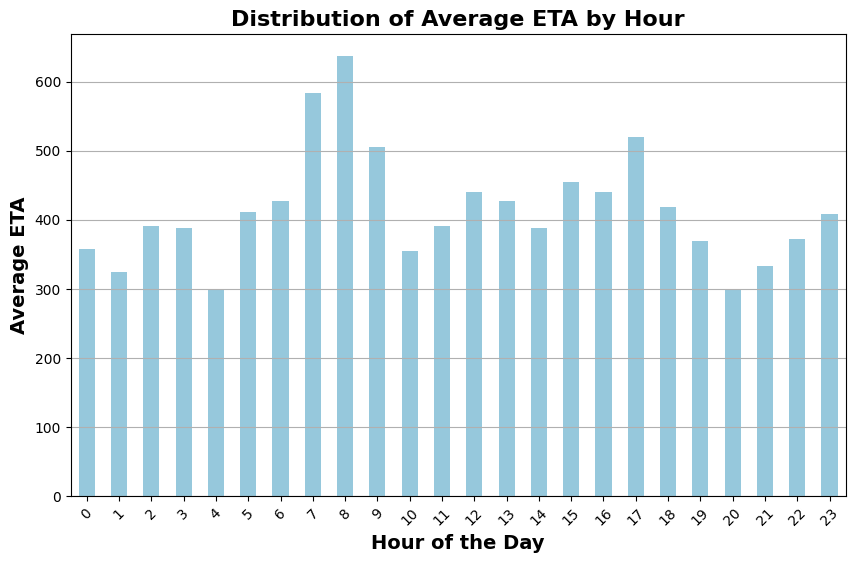

In [245]:
# Plotting the distribution of average ETA by hour using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=average_eta_by_hour.index, y=average_eta_by_hour.values, color='skyblue', saturation=0.7, width=0.5)
plt.title('Distribution of Average ETA by Hour', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=14, fontweight='bold')
plt.ylabel('Average ETA', fontsize=14, fontweight='bold')
plt.grid(axis='y')  # Add grid lines along the y-axis for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### task 5

In [297]:
import folium
import h3

In [309]:
# Define an empty dictionary to store counts of orders in each hexagon
hex_counts = {}

# Iterate over each order's latitude and longitude, assign them to hexagons, and count the orders in each hexagon
for _, row in df_orders.iterrows():
    lat, lng = row['origin_latitude'], row['origin_longitude']
    hex_id = h3.geo_to_h3(lat, lng, resolution=8)  # Using default resolution of 8
    hex_counts[hex_id] = hex_counts.get(hex_id, 0) + 1

# Sort the hexagons by the number of orders in descending order
sorted_hex_counts = sorted(hex_counts.values(), reverse=True)

# Calculate the total number of orders
total_orders = sum(sorted_hex_counts)

# Calculate the number of hexagons containing 80% of the orders
cumulative_orders = 0
hexagons_80_percent = []
for count in sorted_hex_counts:
    cumulative_orders += count
    if cumulative_orders >= 0.8 * total_orders:
        break

# Determine the index at which 80% of the orders are reached
index_80_percent = sorted_hex_counts.index(count)

# Get the number of hexagons containing 80% of the orders
num_hexagons_80_percent = index_80_percent + 1

# Sort the dictionary based on values in descending order
sorted_hex_counts = sorted(hex_counts.items(), key=lambda x: x[1], reverse=True)

# Fill the top n items into hexagons_80_percent
hexagons_80_percent = [item[0] for item in sorted_hex_counts[:num_hexagons_80_percent]]

print("Number of hexagons containing 80% of all orders:", num_hexagons_80_percent)

Number of hexagons containing 80% of all orders: 24


In [323]:
# Create a map centered around the mean latitude and longitude of the orders
map_center = [df_orders['origin_latitude'].mean(), df_orders['origin_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Define a color scale for the number of orders, ranging from light blue to dark blue
color_scale = folium.LinearColormap(['lightblue', 'darkblue'], vmin=min(hex_counts.values()), vmax=max(hex_counts.values()))

# Add 80%-hexagons to the map, coloring them based on the number of orders within each hexagon
for hex_id in hexagons_80_percent:
    vertices = h3.h3_to_geo_boundary(hex_id)  # Get the vertices of the hexagon
    lat_lngs = [[lat, lng] for lat, lng in vertices]  # Convert vertices to latitudes and longitudes
    count = hex_counts.get(hex_id, 0)
    folium.Polygon(
        locations=lat_lngs,
        fill=True,
        fill_color=color_scale(count),
        fill_opacity=0.6,
        color=None  # Remove the border color
    ).add_to(m)

# Add the color scale to the map
color_scale.caption = 'Number of Orders'
m.add_child(color_scale)

# Display the map
m